<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DGarcia-A01086411/blob/main/Actividad_Semana_8_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#David Eduardo Garcia Reyes - A01086411

##Actividad Semana 8 - 7 Regresiones

#**EJERCICIO 1 - Costo en la industria de la manufactura**

##Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
##Regresión Lineal.
###Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
##Regresión Polinomial.
###Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
##Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
##Finalmente grafica :
###MAE (de los cuatro métodos)
###R^2 (de los cuatro métodos)
##Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [1]:
#Importar librerias necesarias
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [2]:
#Cargar dataset
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
463,4.309436,40.139700
493,4.429052,39.501350
282,3.721616,41.496755
772,5.446994,32.266583
731,5.266977,35.207129
113,2.872303,45.302208
296,3.762414,39.668907
572,4.668738,47.138771
639,4.969934,37.460747
825,5.633084,37.180147


In [3]:
X = df[['Number of Units']]
Y = df['Manufacturing Cost']

In [4]:
len(X)

1000

In [5]:
Y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

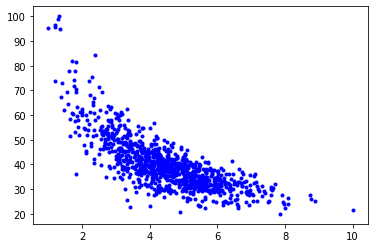

In [6]:
plt.plot(X,Y,'b.')

In [7]:
#Dividir los datos de costos de manufactura
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 200
number of training samples: 800


In [8]:
#Regresion Lineal

In [9]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x_train, y_train)
linear_reg.coef_, linear_reg.intercept_

(array([-6.04244726]), 67.01306355970974)

Ecuación:

$\hat{y} = -6.0424X + 67.0130$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


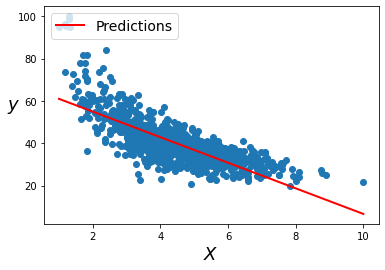

In [10]:
#Visualizar prediccion
X_fit = np.linspace(1, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [11]:
#Lista de errores para su posterior graficacion
Error_List = list()

In [12]:
#MAE, R^2 Error, R^2 Score
yhat = linear_reg.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List.append({"Regresiones": "Regresion lineal", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 4.920843720260218
Root Mean Squared Error: 6.8718075865038175
R^2 Score 0.5789359098485234


In [13]:
#Regresion Polinomial

In [14]:
from sklearn.preprocessing import PolynomialFeatures
Polynomial = PolynomialFeatures(degree=2, include_bias=False)
Polynomial_features = Polynomial.fit_transform(X)
Polynomial_reg_model = LinearRegression()
Polynomial_reg_model.fit(Polynomial_features, Y)
Polynomial_reg_model.coef_, Polynomial_reg_model.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

Ecuación:

$\hat{y} = -16.8242X + 1.1733X^2 + 89.7371$

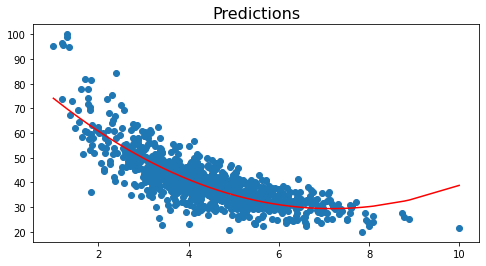

In [15]:
#Visualizar prediccion
y_predicted = Polynomial_reg_model.predict(Polynomial_features)

plt.figure(figsize=(8, 4))
plt.title("Predictions", size=16)
plt.scatter(X, Y)
plt.plot(X, y_predicted, c="red")
plt.show()

In [16]:
#MAE, R^2 Error, R^2 Score
yhat = Polynomial_reg_model.predict(Polynomial_features)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List.append({"Regresiones": "Regresion Polinomial", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
R^2 Score 0.6650268116056028


In [17]:
#Regresion Ridge

In [18]:
from sklearn.linear_model import Ridge
Ridge_regr = Ridge(fit_intercept=True)
Ridge_regr.fit(x_train, y_train)
y_new = Ridge_regr.predict(x_test)
Ridge_regr.coef_, Ridge_regr.intercept_

(array([-6.03819131]), 66.99400595374111)

Ecuación:

$\hat{y} = -6.0381X + 66.9940$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


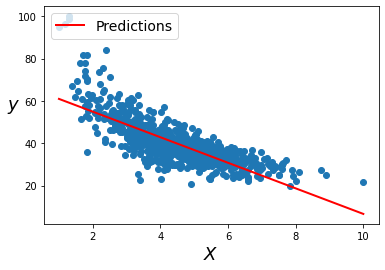

In [19]:
#Visualizar prediccion
x_fit = np.linspace(1, 10, 100)
y_fit = Ridge_regr.predict(x_fit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [20]:
#MAE, R^2 Error, R^2 Score
yhat = Ridge_regr.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List.append({"Regresiones": "Reg. Ridge", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 4.920334804939648
Root Mean Squared Error: 6.871800116619259
R^2 Score 0.5789368252695086


In [21]:
#Regresion Lasso

In [22]:
from sklearn.linear_model import Lasso
Lasso_regr = Lasso(fit_intercept=True)
Lasso_regr.fit(x_train, y_train)
y_new = Lasso_regr.predict(x_test)
Lasso_regr.coef_, Lasso_regr.intercept_

(array([-5.47857595]), 64.48812123765603)

Ecuación:

$\hat{y} = -5.4785X + 64.4881$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


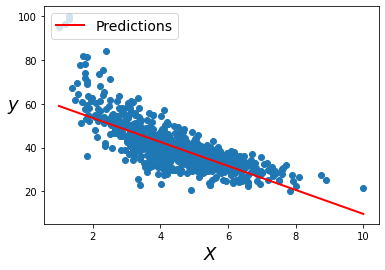

In [23]:
#Visualizar prediccion
x_fit = np.linspace(1, 10, 100)
y_fit = Lasso_regr.predict(x_fit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(x_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [24]:
#MAE, R^2 Error, R^2 Score
yhat = Lasso_regr.predict(X)
MAE = metrics.mean_absolute_error(Y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(Y, yhat))
R2 =  r2_score(Y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List.append({"Regresiones": "Reg. Lasso", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 4.879792294340519
Root Mean Squared Error: 6.911657655968669
R^2 Score 0.5740381924561732


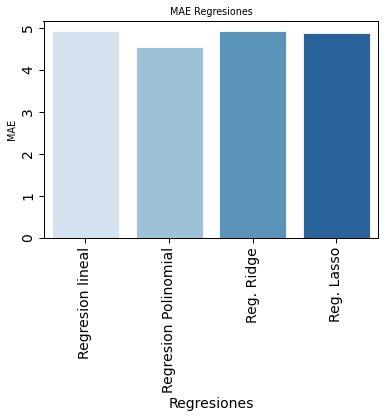

In [37]:
#Graficar MAE
dfErrList = pd.DataFrame(Error_List)

sns.barplot(data = dfErrList, x = 'Regresiones', y = 'MAE',  palette = 'Blues', edgecolor = 'w').set(title = "MAE Regresiones")
plt.xlabel('Regresiones', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14, rotation=90)

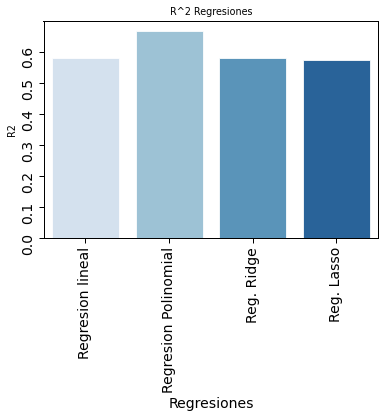

In [36]:
#Graficar R^2
sns.barplot(data = dfErrList, x='Regresiones', y='R2', palette = 'Blues', edgecolor = 'w').set(title = "R^2 Regresiones")
plt.xlabel('Regresiones', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14,   rotation=90)

**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

El metodo que mas le conviene a la empresa es el metodo de Regresion Polinomial ya que obtuvo un R^2 DE 0.65, aun asi es bajo. Convendria realizar limpieza de datos.

Se utilizo un porcentaje de entrenamiento de 80% y de evaluacion de 20%

#**EJERCICIO 2 - Regresión Multiple**

##Encuentra el mejor regresor para los datos de las casas:

##Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
##Regresión Múltiple Lineal.
###Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
##Regresión Múltiple Polinomial.
###Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.
##Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.
##Finalmente gráfica :
###MAE (de los cuatro métodos)
###R^2 (de los cuatro métodos)
##Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

In [38]:
#Cargar dataset
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
900,1923000160,20140620T000000,905000.0,4,3.50,2970,14486,2.0,0,0,...,9,2340,630,1997,0,98040,47.5627,-122.215,3680,14486
9897,123039346,20150430T000000,335000.0,3,1.75,1260,17000,1.0,0,0,...,7,1260,0,1994,0,98146,47.5114,-122.361,1540,7213
7152,4037200585,20140723T000000,394950.0,3,2.50,1090,7700,1.0,0,0,...,7,1090,0,1957,0,98008,47.6070,-122.120,1740,7700
21024,745530180,20150317T000000,870000.0,5,3.50,4495,10079,2.0,0,0,...,9,3580,915,2013,0,98011,47.7339,-122.209,4495,10079
6866,1236300290,20141022T000000,1060000.0,4,3.50,3850,8100,2.0,0,1,...,11,2430,1420,1995,0,98033,47.6855,-122.190,2620,9346
17927,3330501645,20150223T000000,260000.0,3,1.00,1150,3090,1.0,0,0,...,6,1150,0,1910,0,98118,47.5506,-122.276,1150,5664
6652,3558000130,20140909T000000,350000.0,3,2.75,2370,4632,2.0,0,0,...,7,2370,0,2002,0,98038,47.3794,-122.022,2290,5012
10346,9522400350,20141008T000000,500000.0,4,2.25,2490,23478,2.0,0,0,...,8,2490,0,1981,0,98072,47.7547,-122.094,2030,12611
6428,5411600020,20150304T000000,702000.0,4,2.50,2810,4922,2.0,0,0,...,9,2810,0,2005,0,98074,47.6140,-122.041,2920,4922
1982,7298020240,20140509T000000,402500.0,4,2.50,2600,11951,2.0,0,0,...,10,2600,0,1988,0,98023,47.3053,-122.340,2820,12093


In [39]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

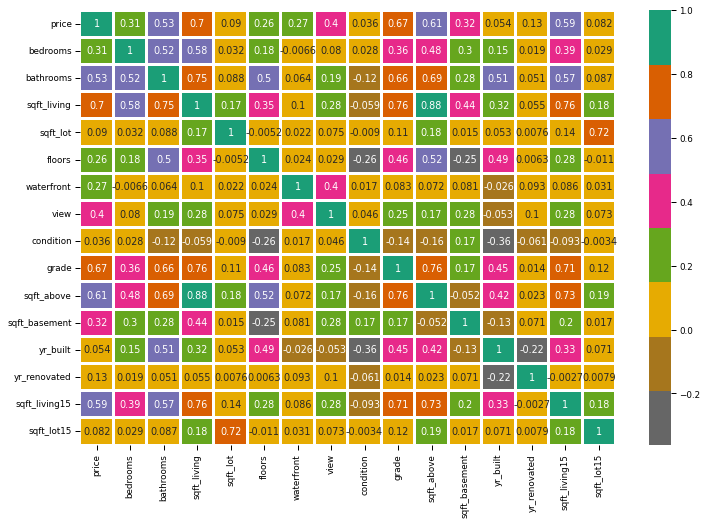

In [41]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [42]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [49]:
#Regresion Multiple Lineal

In [48]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

Ecuación:

$\hat{y} = -3.8200X1 + 4.1466X2 + 1.0799X3 + 1.7135X4 + 3.1691X5 + 5.5269X6 + 4.1249X7 + 2.1222X8 + 1.1949X9 + 4.7775X10 + 6.0217X11 - 3.5509X12 + 1.3260X13 + 2.9005X14 - 5.4813X15 + 6151359.2627$

In [50]:
#Lista de errores para su posterior graficacion
Error_List_Ej2 = list()

In [52]:
#MAE, R^2 Error, R^2 Score
yhat = linear_reg.predict(X)
MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List_Ej2.append({"Regresiones": "Regresion lineal", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 139090.35238662068
Root Mean Squared Error: 216092.052373392
R^2 Score 0.6535308525095571


In [53]:
#Regresion Multiple Polinomial

In [54]:
Polynomial = PolynomialFeatures(degree=2, include_bias=False)
Polynomial_features = Polynomial.fit_transform(X)
Polynomial_reg_model = LinearRegression()
Polynomial_reg_model.fit(Polynomial_features, y)
Polynomial_reg_model.coef_, Polynomial_reg_model.intercept_

(array([[ 8.94115427e+05, -8.98409208e+05, -5.17240938e+02,
         -3.55977014e+01, -2.15011492e+06, -3.98148622e+06,
         -1.88560460e+05,  4.95587204e+05,  1.05263940e+06,
         -7.04027889e+01, -3.80996221e+02, -8.61498107e+04,
         -3.22193821e+03,  3.84970084e+03, -2.83458052e+01,
          8.37043328e+02,  5.72452749e+03, -1.45880059e+01,
          7.00680239e-03,  1.14464912e+04,  9.30617284e+03,
         -2.14902027e+03, -3.10398878e+03, -2.74924724e+03,
         -6.98093498e-01, -9.98026442e+00, -4.59786576e+02,
         -9.38813407e+00,  1.64884247e+01,  2.20585620e-01,
         -8.55956132e+03,  1.80029508e+01, -3.29146641e-01,
         -2.76018345e+04,  1.48236315e+04,  8.30182511e+03,
         -1.43873699e+03,  1.92568085e+04,  1.84120354e+01,
         -8.34279772e-01,  4.14321761e+02, -2.09112139e+01,
         -1.93438257e+01,  1.14904964e-01,  6.76581280e+00,
         -3.96969272e+00, -3.29286803e+00,  1.60000127e+02,
         -1.07829321e+01,  8.10322898e+0

In [55]:
#MAE, R^2 Error, R^2 Score
yhat = Polynomial_reg_model.predict(Polynomial_features)
MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List_Ej2.append({"Regresiones": "Regresion Polinomial", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 122947.10324712306
Root Mean Squared Error: 183003.23258819562
R^2 Score 0.751512525995311


In [56]:
#Regresion Ridge

In [58]:
Ridge_regr = Ridge(fit_intercept=True)
Ridge_regr.fit(X_train, y_train)
y_new = Ridge_regr.predict(X_test)
Ridge_regr.coef_, Ridge_regr.intercept_

(array([[-3.82192265e+04,  4.14509656e+04,  1.08013951e+02,
          1.69318239e-02,  3.16891574e+04,  5.48258333e+05,
          4.14559235e+04,  2.12264347e+04,  1.19470568e+05,
          4.78066878e+01,  6.02065605e+01, -3.55050129e+03,
          1.33171890e+01,  2.89851987e+01, -5.47998512e-01]]),
 array([6150751.3836867]))

Ecuación:

$\hat{y} = -3.8219X1 + 4.1450X2 + 1.0801X3 + 1.6931X4 + 3.1689X5 + 5.4825X6 + 4.1455X7 + 2.1226X8 + 1.1947X9 + 4.7806X10 + 6.0206X11 - 3.5505X12 + 1.3317X13 + 2.8985X14 - 5.4799X15 + 6150751.3836$

In [59]:
#MAE, R^2 Error, R^2 Score
yhat = Ridge_regr.predict(X)
MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List_Ej2.append({"Regresiones": "Reg. Ridge", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 139091.35944656763
Root Mean Squared Error: 216095.7373511175
R^2 Score 0.6535190358604672


In [60]:
#Regresion Lasso

In [61]:
Lasso_regr = Lasso(fit_intercept=True)
Lasso_regr.fit(X_train, y_train)
y_new = Lasso_regr.predict(X_test)
Lasso_regr.coef_, Lasso_regr.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-3.81995345e+04,  4.14618568e+04,  2.93480482e+02,  1.71281822e-02,
         3.16871411e+04,  5.52541108e+05,  4.12549654e+04,  2.12193902e+04,
         1.19491837e+05, -1.37708200e+02, -1.25268449e+02, -3.55085005e+03,
         1.32628460e+01,  2.90053298e+01, -5.48136075e-01]),
 array([6151280.11390041]))

Ecuación:

$\hat{y} = -3.8199X1 + 4.1461X2 + 2.9348X3 + 1.7128X4 + 3.1687X5 + 5.5254X6 + 4.1254X7 + 2.1219X8 + 1.1949X9 - 1.3770X10 - 1.2526X11 - 3.5585X12 + 1.3262X13 + 2.9005X14 - 5.4813X15 + 6151280.1139$

In [62]:
#MAE, R^2 Error, R^2 Score
yhat = Lasso_regr.predict(X)
MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)
print('Mean Absolute Error (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('R^2 Score', R2)

Error_List_Ej2.append({"Regresiones": "Reg. Lasso", "MAE":MAE, "RMSE":RMSE, "R2":R2})

Mean Absolute Error (MAE): 139090.4100648079
Root Mean Squared Error: 216092.17734606357
R^2 Score 0.6535304517619404


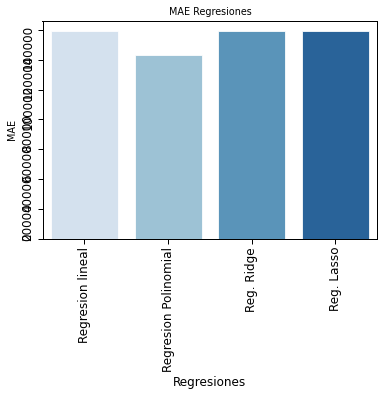

In [64]:
#Graficar MAE
dfErrList = pd.DataFrame(Error_List_Ej2)

sns.barplot(data = dfErrList, x = 'Regresiones', y = 'MAE',  palette = 'Blues', edgecolor = 'w').set(title = "MAE Regresiones")
plt.xlabel('Regresiones', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=90)

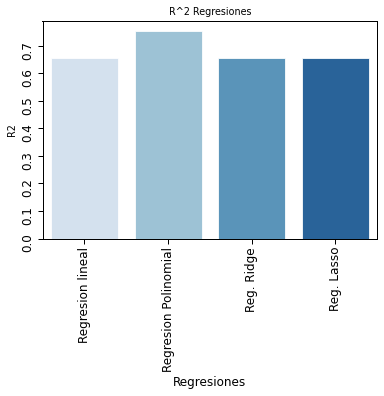

In [65]:
#Graficar R^2
sns.barplot(data = dfErrList, x='Regresiones', y='R2', palette = 'Blues', edgecolor = 'w').set(title = "R^2 Regresiones")
plt.xlabel('Regresiones', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12,   rotation=90)

**Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**

El metodo que se aproxima mejor es la Regresion Polinomial al tener R^2 de 0.75. 

Se utilizo un porcentaje de entrenamiento de 90% y de evaluacion de 10%.